In [1]:
!pip install opencv-python==3.4.0.12 -q
!pip install opencv-contrib-python==3.4.0.12 -q

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## SIFT Feature Detector

In [3]:
img = cv2.imread('.\\UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\airplane\\airplane00.tif')#, cv2.IMREAD_GRAYSCALE)

sift = cv2.xfeatures2d.SIFT_create()
surf = cv2.xfeatures2d.SURF_create()
orb = cv2.ORB_create(nfeatures=1500)

keypoints, descriptors = sift.detectAndCompute(img, None)

img_sift = cv2.drawKeypoints(img, keypoints, None)

#cv2.imshow("Image", img)

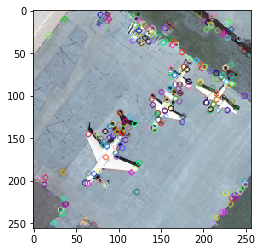

In [4]:
plt.imshow(img_sift)

## Saliency Detection

In [5]:
#img = cv2.imread('UCMerced_LandUse\\UCMerced_LandUse\\Images\\airplane\\airplane00.tif')
saliency = cv2.saliency.StaticSaliencyFineGrained_create()
(success, saliencyMap) = saliency.computeSaliency(img)
saliencyMap = (saliencyMap * 255).astype("uint8")
threshMap = cv2.threshold(saliencyMap, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]


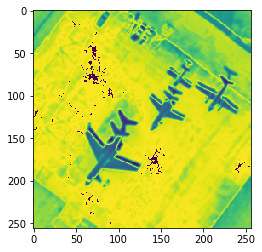

In [6]:
plt.imshow(saliencyMap)
plt.show()

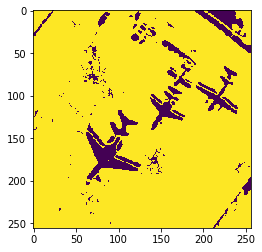

In [7]:
plt.imshow(threshMap)
plt.show()

# 1: Cross Validation - 5 Fold

## Read Images

In [8]:
import glob

In [9]:
trainpath = "UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\"

In [10]:
def readImages(path):
    count = 0
    imageList = {}
    for i, img_path in enumerate(glob.glob(path+"*")):
        word = img_path.split('\\')[-1]
        print(" #### Reading image category ", word, " ##### ")
        imageList[word] = []
        for imgfile in glob.glob(path+word+"\\*.tif"):
            print("Reading file ", imgfile)
            im = cv2.imread(imgfile, 0)
            imageList[word].append(im)
            count +=1
    return [imageList, count]

    

In [11]:
imglist_train, totalImages_train = readImages(trainpath)

(' #### Reading image category ', 'agricultural', ' ##### ')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\agricultural\\agricultural00.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\agricultural\\agricultural01.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\agricultural\\agricultural02.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\agricultural\\agricultural03.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\agricultural\\agricultural04.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\agricultural\\agricultural05.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\agricultural\\agricultural06.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\agricultural\\agricultural07.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\agricultural\\agricu

('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\agricultural\\agricultural83.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\agricultural\\agricultural84.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\agricultural\\agricultural85.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\agricultural\\agricultural86.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\agricultural\\agricultural87.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\agricultural\\agricultural88.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\agricultural\\agricultural89.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\agricultural\\agricultural90.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\agricultural\\agricultural91.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_

('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\airplane\\airplane66.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\airplane\\airplane67.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\airplane\\airplane68.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\airplane\\airplane69.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\airplane\\airplane70.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\airplane\\airplane71.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\airplane\\airplane72.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\airplane\\airplane73.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\airplane\\airplane74.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\airplane\\airplane75.tif')
('Reading file ', 'U

('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\baseballdiamond\\baseballdiamond44.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\baseballdiamond\\baseballdiamond45.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\baseballdiamond\\baseballdiamond46.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\baseballdiamond\\baseballdiamond47.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\baseballdiamond\\baseballdiamond48.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\baseballdiamond\\baseballdiamond49.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\baseballdiamond\\baseballdiamond50.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\baseballdiamond\\baseballdiamond51.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\baseballdiamond\\baseballdiamond5

('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\beach\\beach24.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\beach\\beach25.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\beach\\beach26.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\beach\\beach27.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\beach\\beach28.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\beach\\beach29.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\beach\\beach30.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\beach\\beach31.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\beach\\beach32.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\beach\\beach33.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\beach\\be

('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\buildings\\buildings14.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\buildings\\buildings15.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\buildings\\buildings16.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\buildings\\buildings17.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\buildings\\buildings18.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\buildings\\buildings19.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\buildings\\buildings20.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\buildings\\buildings21.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\buildings\\buildings22.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\buildings\\buildings23.tif')


('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\buildings\\buildings99.tif')
(' #### Reading image category ', 'chaparral', ' ##### ')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\chaparral\\chaparral00.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\chaparral\\chaparral01.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\chaparral\\chaparral02.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\chaparral\\chaparral03.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\chaparral\\chaparral04.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\chaparral\\chaparral05.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\chaparral\\chaparral06.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\chaparral\\chaparral07.tif')
('Reading file ', 'UCMerced_LandUse\\UCMer

('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\chaparral\\chaparral87.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\chaparral\\chaparral88.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\chaparral\\chaparral89.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\chaparral\\chaparral90.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\chaparral\\chaparral91.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\chaparral\\chaparral92.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\chaparral\\chaparral93.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\chaparral\\chaparral94.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\chaparral\\chaparral95.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\chaparral\\chaparral96.tif')


('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\denseresidential\\denseresidential61.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\denseresidential\\denseresidential62.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\denseresidential\\denseresidential63.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\denseresidential\\denseresidential64.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\denseresidential\\denseresidential65.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\denseresidential\\denseresidential66.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\denseresidential\\denseresidential67.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\denseresidential\\denseresidential68.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\denseresidential\

('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\forest\\forest41.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\forest\\forest42.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\forest\\forest43.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\forest\\forest44.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\forest\\forest45.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\forest\\forest46.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\forest\\forest47.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\forest\\forest48.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\forest\\forest49.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\forest\\forest50.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Image

('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\freeway\\freeway31.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\freeway\\freeway32.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\freeway\\freeway33.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\freeway\\freeway34.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\freeway\\freeway35.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\freeway\\freeway36.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\freeway\\freeway37.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\freeway\\freeway38.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\freeway\\freeway39.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\freeway\\freeway40.tif')
('Reading file ', 'UCMerced_LandUse\\UCM

('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\golfcourse\\golfcourse21.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\golfcourse\\golfcourse22.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\golfcourse\\golfcourse23.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\golfcourse\\golfcourse24.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\golfcourse\\golfcourse25.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\golfcourse\\golfcourse26.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\golfcourse\\golfcourse27.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\golfcourse\\golfcourse28.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\golfcourse\\golfcourse29.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\golfcourse\

('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\harbor\\harbor01.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\harbor\\harbor02.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\harbor\\harbor03.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\harbor\\harbor04.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\harbor\\harbor05.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\harbor\\harbor06.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\harbor\\harbor07.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\harbor\\harbor08.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\harbor\\harbor09.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\harbor\\harbor10.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Image

('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\harbor\\harbor89.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\harbor\\harbor90.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\harbor\\harbor91.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\harbor\\harbor92.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\harbor\\harbor93.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\harbor\\harbor94.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\harbor\\harbor95.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\harbor\\harbor96.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\harbor\\harbor97.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\harbor\\harbor98.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Image

('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\intersection\\intersection69.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\intersection\\intersection70.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\intersection\\intersection71.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\intersection\\intersection72.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\intersection\\intersection73.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\intersection\\intersection74.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\intersection\\intersection75.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\intersection\\intersection76.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\intersection\\intersection77.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_

('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mediumresidential\\mediumresidential43.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mediumresidential\\mediumresidential44.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mediumresidential\\mediumresidential45.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mediumresidential\\mediumresidential46.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mediumresidential\\mediumresidential47.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mediumresidential\\mediumresidential48.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mediumresidential\\mediumresidential49.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mediumresidential\\mediumresidential50.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\m

('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mobilehomepark\\mobilehomepark16.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mobilehomepark\\mobilehomepark17.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mobilehomepark\\mobilehomepark18.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mobilehomepark\\mobilehomepark19.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mobilehomepark\\mobilehomepark20.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mobilehomepark\\mobilehomepark21.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mobilehomepark\\mobilehomepark22.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mobilehomepark\\mobilehomepark23.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mobilehomepark\\mobilehomepark24.tif')
('Reading 

('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mobilehomepark\\mobilehomepark93.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mobilehomepark\\mobilehomepark94.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mobilehomepark\\mobilehomepark95.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mobilehomepark\\mobilehomepark96.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mobilehomepark\\mobilehomepark97.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mobilehomepark\\mobilehomepark98.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\mobilehomepark\\mobilehomepark99.tif')
(' #### Reading image category ', 'overpass', ' ##### ')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\overpass\\overpass00.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\over

('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\overpass\\overpass83.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\overpass\\overpass84.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\overpass\\overpass85.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\overpass\\overpass86.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\overpass\\overpass87.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\overpass\\overpass88.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\overpass\\overpass89.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\overpass\\overpass90.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\overpass\\overpass91.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\overpass\\overpass92.tif')
('Reading file ', 'U

('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\parkinglot\\parkinglot64.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\parkinglot\\parkinglot65.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\parkinglot\\parkinglot66.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\parkinglot\\parkinglot67.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\parkinglot\\parkinglot68.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\parkinglot\\parkinglot69.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\parkinglot\\parkinglot70.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\parkinglot\\parkinglot71.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\parkinglot\\parkinglot72.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\parkinglot\

('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\river\\river52.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\river\\river53.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\river\\river54.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\river\\river55.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\river\\river56.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\river\\river57.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\river\\river58.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\river\\river59.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\river\\river60.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\river\\river61.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\river\\ri

('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\runway\\runway48.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\runway\\runway49.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\runway\\runway50.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\runway\\runway51.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\runway\\runway52.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\runway\\runway53.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\runway\\runway54.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\runway\\runway55.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\runway\\runway56.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\runway\\runway57.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Image

('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\sparseresidential\\sparseresidential28.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\sparseresidential\\sparseresidential29.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\sparseresidential\\sparseresidential30.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\sparseresidential\\sparseresidential31.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\sparseresidential\\sparseresidential32.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\sparseresidential\\sparseresidential33.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\sparseresidential\\sparseresidential34.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\sparseresidential\\sparseresidential35.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\s

('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\storagetanks\\storagetanks01.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\storagetanks\\storagetanks02.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\storagetanks\\storagetanks03.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\storagetanks\\storagetanks04.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\storagetanks\\storagetanks05.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\storagetanks\\storagetanks06.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\storagetanks\\storagetanks07.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\storagetanks\\storagetanks08.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\storagetanks\\storagetanks09.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_

('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\storagetanks\\storagetanks82.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\storagetanks\\storagetanks83.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\storagetanks\\storagetanks84.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\storagetanks\\storagetanks85.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\storagetanks\\storagetanks86.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\storagetanks\\storagetanks87.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\storagetanks\\storagetanks88.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\storagetanks\\storagetanks89.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\storagetanks\\storagetanks90.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_

('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\tenniscourt\\tenniscourt60.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\tenniscourt\\tenniscourt61.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\tenniscourt\\tenniscourt62.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\tenniscourt\\tenniscourt63.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\tenniscourt\\tenniscourt64.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\tenniscourt\\tenniscourt65.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\tenniscourt\\tenniscourt66.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\tenniscourt\\tenniscourt67.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\Images\\tenniscourt\\tenniscourt68.tif')
('Reading file ', 'UCMerced_LandUse\\UCMerced_LandUse\\Images\\I

In [12]:
#create name dictionary
name_dict = {}
for i, k in enumerate(imglist_train.keys()):
    name_dict[k] = i
name_dict

{'agricultural': 16,
 'airplane': 17,
 'baseballdiamond': 9,
 'beach': 19,
 'buildings': 1,
 'chaparral': 20,
 'denseresidential': 15,
 'forest': 14,
 'freeway': 10,
 'golfcourse': 2,
 'harbor': 5,
 'intersection': 18,
 'mediumresidential': 3,
 'mobilehomepark': 8,
 'overpass': 0,
 'parkinglot': 4,
 'river': 12,
 'runway': 7,
 'sparseresidential': 13,
 'storagetanks': 6,
 'tenniscourt': 11}

## Create Features

In [13]:
def extractFeats(img_dict, name_dict, feat_type='sift'):

    sift = cv2.xfeatures2d.SIFT_create()
    surf = cv2.xfeatures2d.SURF_create()
    orb = cv2.ORB_create(nfeatures=1500)

    descriptor_list = []
    labels = np.array([])
    for word, imList in img_dict.items():
        for img in imList:
            labels = np.append(labels, name_dict[word])
            if(feat_type=='sift'):
                keypoints, descriptors = sift.detectAndCompute(img, None)
            elif(feat_type=='surf'):
                keypoints, descriptors = surf.detectAndCompute(img, None)
            else:
                keypoints, descriptors = orb.detectAndCompute(img, None)
            descriptor_list.append(descriptors)
    return [descriptor_list, labels]
    

In [14]:
descriptors_train, labels_train = extractFeats(imglist_train, name_dict)

In [15]:
#clean out any None types
descriptors_train_clean = [x for x in descriptors_train if x is not None]
labels_train_clean = [l for i, l in enumerate(labels_train) if descriptors_train[i] is not None]

In [16]:
train_stack = np.vstack(descriptors_train_clean)

In [17]:
len(labels_train_clean)

2096

In [18]:
len(labels_train)

2100

NameError: name 'descriptors_train_clean' is not defined

## Cluster! - Create Visual Words

In [19]:
from sklearn.cluster import KMeans

In [19]:
n_clusters = 10

In [20]:
def kmeans_fitpredict(n_clusters, n_jobs=-1):
    km_model = KMeans(n_clusters=n_clusters, n_jobs=-1)
    kmeans_ret = km_model.fit_predict(train_stack)
    return kmeans_ret

In [21]:
kmeans_ret = kmeans_fitpredict(2)

In [22]:
kmeans_ret.shape

(1473417L,)

## Make Image feature Histograms

In [25]:
def make_featHistograms(descriptors_train_clean, labels_train_clean, kmeans_ret, n_clusters):
    histograms = np.array([np.zeros(n_clusters) for i in range(len(labels_train_clean))]) # (rows=images x cols=codewords/clusters)
    cnt = 0
    for i in range(len(labels_train_clean)): #
        l = len(descriptors_train_clean[i])
        for j in range(l): #go thru each descriptor for each image
            idx = kmeans_ret[cnt+j]
            histograms[i][idx] += 1
        cnt += 1
    return histograms

In [26]:
histograms = make_featHistograms(descriptors_train_clean, labels_train_clean, kmeans_ret, 2)

### Normalize histogram

In [27]:
from sklearn.preprocessing import normalize, StandardScaler

In [28]:
histograms

array([[421., 375.],
       [343., 310.],
       [371., 332.],
       ...,
       [731., 730.],
       [779., 764.],
       [834., 812.]])

In [36]:
# use L2 normalization along rows-> histogram of each img
# histograms_norm = normalize(histograms, norm='l2', axis=0)

In [36]:
def normalizeHistograms(hists):
    # use standardize to normalize distribution
    scale = StandardScaler().fit(hists)
    hists = scale.transform(hists)
    return hists

In [37]:
histograms_norm = normalizeHistograms(histograms)

In [38]:
histograms_norm.shape

(2096L, 2L)

In [39]:
labels_train.shape

(2100L,)

In [40]:
histograms_norm

array([[ 0.24140046,  0.15390461],
       [-0.08576319, -0.12804413],
       [ 0.03168017, -0.03261533],
       ...,
       [ 1.54166626,  1.69377847],
       [ 1.74299774,  1.84125935],
       [ 1.97369006,  2.04946765]])

## Train SVM Classifier and Test

In [42]:
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.utils import shuffle

In [43]:
def kfoldCrossValid(norm_histograms, labels, cv=5, n_jobs=-1, n_std=1.96, kernel='linear'):
    svc = SVC(kernel=kernel)
    scores = cross_val_score(svc, norm_histograms, labels, cv=cv, n_jobs=n_jobs)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * n_std)) #mean score and 95% confidence interval n_std = 1.96
    
    return (scores.mean(), scores.std()*n_std)
    

In [44]:
# X = histograms_norm
# y = labels_train_clean
# skf = StraftifiedKFold(n_splits=5, shuffle=True, random_state=None)
# for train_index, test_index in skf.split(X, y):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
#     svc.fit(X_train, y_train)

In [47]:
scores_tup = kfoldCrossValid(histograms_norm, labels_train_clean)

Accuracy: 0.22 (+/- 0.03)


### classification rate for visual dictionary sizes

In [48]:
n_clusters_list = [10, 25, 50, 75, 100, 125, 150, 175, 200, 300, 400, 500, 1000, 5000]

In [50]:
scores_tup_list = []
for n_cluster in n_clusters_list[0:3]:
    kmeans_ret = kmeans_fitpredict(n_cluster)
    histograms = make_featHistograms(descriptors_train_clean, labels_train_clean, kmeans_ret, n_cluster)
    histograms_norm = normalizeHistograms(histograms)
    scores_tup = kfoldCrossValid(histograms_norm, labels_train_clean)
    scores_tup_list.append(scores_tup)

Accuracy: 0.76 (+/- 0.18)
Accuracy: 0.82 (+/- 0.30)
Accuracy: 0.85 (+/- 0.32)


In [53]:
scores_tup_list

[(0.7633746984079857, 0.18142351927917727),
 (0.82483150270991, 0.29943748648682583),
 (0.8463146910452524, 0.3195479169338742),
 (0.8463033043663618, 0.32152163146645124),
 (0.8439143584715749, 0.3461824614084183),
 (0.8396332064702872, 0.35679736618628227),
 (0.8558521711090483, 0.31401301239177226)]

In [52]:
for n_cluster in n_clusters_list[3:]:
    kmeans_ret = kmeans_fitpredict(n_cluster)
    histograms = make_featHistograms(descriptors_train_clean, labels_train_clean, kmeans_ret, n_cluster)
    histograms_norm = normalizeHistograms(histograms)
    scores_tup = kfoldCrossValid(histograms_norm, labels_train_clean)
    scores_tup_list.append(scores_tup)

Accuracy: 0.85 (+/- 0.32)
Accuracy: 0.84 (+/- 0.35)
Accuracy: 0.84 (+/- 0.36)
Accuracy: 0.86 (+/- 0.31)


KeyboardInterrupt: 

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(histograms_norm, labels_train, test_size=0.2, random_state=42, stratify=list(labels_train))

In [ ]:
svc_model = SVC(kernel='linear', C=1)

In [ ]:
svc_model.fit(X_train, y_train)

In [ ]:
svc_model.score(X_val, y_val)

In [ ]:
### try shuffling whole thing to train model
X_tr, y_tr = shuffle(histograms_norm, labels_train)

In [ ]:
svc_model.fit(X_tr, y_tr)

# 2 Test

## Read files

In [ ]:
testpath = "UCMerced_LandUse\\UCMerced_LandUse\\Images\\train\\"

In [ ]:
imglist_test, totalImages_test = readImages(testpath)

## Get Features

In [ ]:
descriptors_test, labels_test = extractFeats(imglist_test, name_dict)

In [ ]:
#clean out any None types
descriptors_test_clean = [x for x in descriptors_test if x is not None]
labels_test_clean = [l for i, l in enumerate(labels_test) if descriptors_test[i] is not None]

In [ ]:
test_stack = np.vstack(descriptors_test_clean)

In [ ]:
#X_test, y_test = shuffle(descriptors_test_clean, labels_test_clean)
X_test, y_test = descriptors_test_clean, labels_test_clean

## Make Predictions

In [ ]:
def makeprediction(feats, n_clusters=n_clusters, km=km_model, scale=scale, model=svc_model):
    #vocab for test image
    vocab = np.array([[0 for i in range(n_clusters)]])
    
    # return of kmeans nearest clusters for N features
    test_ret = km.predict(feats)
    
    for each in test_ret:
        vocab[0][each] += 1
    #print(vocab)
    
    #scale the features
    vocab = scale.transform(vocab)
    
    # predict the class of the image
    lb = model.predict(vocab)
    
    return lb[0]

In [ ]:
pred_y = [makeprediction(x_t) for x_t in X_test]

In [ ]:
pred_y

In [ ]:
len(pred_y)

In [ ]:
y_test

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
cnf_matrix = confusion_matrix(y_test, pred_y)
np.set_printoptions(precision=2)

In [ ]:
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=list(name_dict.keys()), title='Confusion matrix, without normalization')
plt.show()